In [1]:
from MicrogridPSO_module import *
from MicrogridPSO_module_flowchart import *
from MicrogridPSO_module_PSO import *

In [2]:
# inspect functions
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.isfunction))

# inspect methods
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.ismethod))

# inspect object & methods
# print(dir(MicrogridPSO_initialize))

In [3]:
# How to initialize
# Class check
#CSVを読み込みインスタンスを作成。
PSO = MicrogridPSO_initialize("Target_input.csv")

#初期値を設定
PSO.set_initial_input_values({"number_demand": 10,
                              "pv_capacity_per_unit": 245,
                              "SOC_max[%]": 0.9,
                              "SOC_min[%]": 0.2,
                              "SOC_start[%]": 0.5
                              })
#初期値を設定
PSO.set_initial_cost_parameters({'PV_cost[yen/kWh]': 40,
                                 'battery_cost[yen/kWh]': 100,
                                 'diesel_cost[yen/kWh]': 140})

# PSOの中身を確認
# print(dir(PSO))
#print(vars(PSO))

In [4]:
%%time
"""
#ここからForで回すような感じで設備容量の最適解を探していく。
#つまり、これが粒子となる。
PSO.update_fitness_variable_parameters(
    {'pv_cap_max': 4000, 'battery_cap_max': 3, 'diesel_max': 2})

#毎回、容量が変わるのでバッテリーのリミットを更新
PSO.set_battery_limit()
"""
iterations_PSO(PSO)

#フローチャートをループで回して計算結果を取得
#df, total_check, variables, total_cost ,success_loops, failed_loops = loop_flowchart(PSO)

Inform the number of iterations: 50
Inform the number of particles: 10
Inform w: 0.9
Inform c1: 0.4
Inform c2: 0.7
{'pv_cap_max': 0, 'battery_cap_max': 0, 'diesel_max': 0} 
iterations: 50 n_particles: 10 w: 0.9 c1: 0.4 c2: 0.7 particle: {'particle_position_vector': array([[1.07430370e+05, 4.21370487e-01, 4.76534130e+01],
       [3.97716570e+05, 2.46934692e+00, 1.37973845e+01],
       [1.59831130e+05, 5.40146516e+01, 3.45355226e+01],
       [5.76520129e+04, 2.04155173e+00, 1.31502723e+01],
       [1.09044296e+05, 9.43382566e+00, 2.24665183e+00],
       [1.70303161e+05, 6.39267757e+01, 8.56649130e+01],
       [4.29793784e+05, 4.12518613e+01, 9.80005211e+01],
       [4.36303376e+04, 3.12853944e+00, 8.15080588e+01],
       [4.80853754e+05, 1.31663235e+01, 8.25087412e+01],
       [1.51545606e+05, 1.07614197e+01, 9.17277235e+01]]), 'pbest_position': array([[1.07430370e+05, 4.21370487e-01, 4.76534130e+01],
       [3.97716570e+05, 2.46934692e+00, 1.37973845e+01],
       [1.59831130e+05, 5.4014

particle_position_vector is errored
particle_position_vector is errored
    particle_position[ 3 ]  23471.28450281562 particle_vector[ 3 ]  [6835.62521015   55.24060759   22.11116943]
particle_position_vector is errored
    particle_position[ 4 ]  76382.9930947878 particle_vector[ 4 ]  [4.10233132e+05 5.34436232e+01 4.74054961e+01]
    particle_position[ 5 ]  42159.97731509687 particle_vector[ 5 ]  [1.90474798e+05 3.44839543e+01 4.88861476e+01]
particle_position_vector is errored
    particle_position[ 6 ]  28642.74063078174 particle_vector[ 6 ]  [8.95930485e+04 8.96966382e+01 5.00444433e+01]
particle_position_vector is errored
    particle_position[ 7 ]  68939.97590477437 particle_vector[ 7 ]  [3.66157020e+05 2.97282557e+01 6.24971292e+01]
particle_position_vector is errored
    particle_position[ 8 ]  66867.07980681624 particle_vector[ 8 ]  [3.42950464e+05 9.13625983e+01 3.58862063e+01]
particle_position_vector is errored
    particle_position[ 9 ]  86059.2712870167 particle_vector[ 

particle_position_vector is errored
particle_position_vector is errored
    particle_position[ 9 ]  50445.58714366159 particle_vector[ 9 ]  [2.34230952e+05 9.87310572e+01 8.38038210e+00]
-------iteration = 10 -----------
    particle_position[ 0 ]  44274.85033134758 particle_vector[ 0 ]  [2.06262896e+05 2.49386043e+01 6.06463167e+01]
    particle_position[ 1 ]  58088.807260010086 particle_vector[ 1 ]  [2.94528794e+05 3.37744348e+01 7.43359099e+01]
particle_position_vector is errored
    particle_position[ 2 ]  46858.178532202815 particle_vector[ 2 ]  [2.21398401e+05 3.31588253e+01 8.50330004e+01]
particle_position_vector is errored
    particle_position[ 3 ]  59568.299368415304 particle_vector[ 3 ]  [3.05590483e+05 2.70159653e+01 3.89406639e+01]
    particle_position[ 4 ]  20791.203388710997 particle_vector[ 4 ]  [3.93478856e+04 2.08842356e+01 4.67779666e+01]
particle_position_vector is errored
    particle_position[ 5 ]  52893.37165379389 particle_vector[ 5 ]  [2.65845562e+05 8.828167

particle_position_vector is errored
    particle_position[ 5 ]  22282.93106598658 particle_vector[ 5 ]  [5.30291580e+04 2.01188657e+01 2.13897433e+01]
particle_position_vector is errored
    particle_position[ 6 ]  46988.106425703576 particle_vector[ 6 ]  [2.17736544e+05 5.64757396e+01 6.84263967e+01]
    particle_position[ 7 ]  51490.05126882345 particle_vector[ 7 ]  [2.55581838e+05 1.41442343e+01 4.07123206e+01]
particle_position_vector is errored
    particle_position[ 8 ]  39680.66472481651 particle_vector[ 8 ]  [1.64750255e+05 9.74347753e+01 7.24533968e+00]
particle_position_vector is errored
    particle_position[ 9 ]  69672.35713789912 particle_vector[ 9 ]  [3.75337405e+05 8.63522874e+00 8.67387068e+01]
-------iteration = 16 -----------
particle_position_vector is errored
    particle_position[ 0 ]  19570.50753880654 particle_vector[ 0 ]  [2.60777630e+04 4.07984354e+00 5.73388487e+01]
    particle_position[ 1 ]  42556.41213820349 particle_vector[ 1 ]  [1.85274912e+05 8.78875253e

particle_position_vector is errored
    particle_position[ 2 ]  71468.28154124641 particle_vector[ 2 ]  [3.79766397e+05 4.35401517e+01 2.84192439e+01]
particle_position_vector is errored
    particle_position[ 3 ]  35174.509709780206 particle_vector[ 3 ]  [1.38224781e+05 7.70294196e+01 3.90521912e+01]
particle_position_vector is errored
    particle_position[ 4 ]  32935.82453387252 particle_vector[ 4 ]  [1.33678281e+05 1.83209646e+01 4.15191941e+01]
particle_position_vector is errored
particle_position_vector is errored
    particle_position[ 5 ]  66655.55814462132 particle_vector[ 5 ]  [3.44553017e+05 7.22513014e+01 8.09006688e+01]
particle_position_vector is errored
    particle_position[ 6 ]  84139.7314361471 particle_vector[ 6 ]  [4.61259435e+05 5.05720928e+01 2.29002539e+01]
particle_position_vector is errored
    particle_position[ 7 ]  58488.26069795064 particle_vector[ 7 ]  [2.94893481e+05 4.45102687e+01 2.29429088e+01]
particle_position_vector is errored
    particle_position[

    particle_position[ 7 ]  21394.08256651023 particle_vector[ 7 ]  [4.38553754e+04 2.41135819e+01 4.46369612e+01]
particle_position_vector is errored
    particle_position[ 8 ]  84303.56836940974 particle_vector[ 8 ]  [4.55883780e+05 9.21201839e+01 2.10314627e+01]
particle_position_vector is errored
    particle_position[ 9 ]  69530.38933643875 particle_vector[ 9 ]  [3.73654249e+05 1.22621350e+01 3.71486530e+01]
-------iteration = 27 -----------
    particle_position[ 0 ]  64250.09694824113 particle_vector[ 0 ]  [3.29306116e+05 6.79498577e+01 9.30959143e+01]
particle_position_vector is errored
    particle_position[ 1 ]  27230.418952093405 particle_vector[ 1 ]  [7.86097731e+04 9.28499029e+01 5.40793044e+01]
particle_position_vector is errored
    particle_position[ 2 ]  26999.639600610535 particle_vector[ 2 ]  [8.30669134e+04 5.09420757e+01 5.60821348e+01]
particle_position_vector is errored
    particle_position[ 3 ]  63388.904575503606 particle_vector[ 3 ]  [3.28572773e+05 3.6309953

particle_position_vector is errored
    particle_position[ 3 ]  61566.34054933125 particle_vector[ 3 ]  [3.11717081e+05 6.83533456e+01 3.30449237e+01]
particle_position_vector is errored
particle_position_vector is errored
    particle_position[ 4 ]  85973.95101414408 particle_vector[ 4 ]  [4.71629296e+05 6.51561807e+01 6.29859917e+01]
    particle_position[ 5 ]  20231.232834841594 particle_vector[ 5 ]  [25714.12900875    47.2272951     75.75286264]
particle_position_vector is errored
    particle_position[ 6 ]  26250.739440785892 particle_vector[ 6 ]  [123.5506955   37.88578982  26.95392196]
    particle_position[ 7 ]  79228.60959414608 particle_vector[ 7 ]  [4.27097685e+05 6.90804350e+01 8.80423395e+01]
particle_position_vector is errored
    particle_position[ 8 ]  25551.544642415323 particle_vector[ 8 ]  [8.34987790e+04 3.86193399e+00 2.31545834e+01]
particle_position_vector is errored
    particle_position[ 9 ]  70042.93482263411 particle_vector[ 9 ]  [3.71412996e+05 3.90162208e+0

    particle_position[ 1 ]  57515.59330052276 particle_vector[ 1 ]  [2.85235740e+05 6.83612941e+01 7.49764602e+01]
    particle_position[ 2 ]  30586.12587812269 particle_vector[ 2 ]  [1.06659147e+05 7.00254343e+01 7.93712512e+01]
particle_position_vector is errored
    particle_position[ 3 ]  87301.35320138602 particle_vector[ 3 ]  [4.87091169e+05 2.28186057e+01 7.96216676e+01]
particle_position_vector is errored
    particle_position[ 4 ]  20562.133468518485 particle_vector[ 4 ]  [3.18168866e+04 3.04149947e+01 9.26584597e+01]
particle_position_vector is errored
    particle_position[ 5 ]  28926.557156956886 particle_vector[ 5 ]  [1.08305786e+05 4.37545124e+00 9.47217659e+01]
particle_position_vector is errored
    particle_position[ 6 ]  39201.686446500025 particle_vector[ 6 ]  [1.66156961e+05 6.25798789e+01 5.56884553e+01]
    particle_position[ 7 ]  32145.03959916377 particle_vector[ 7 ]  [1.28215741e+05 1.84515444e+01 8.92826395e+01]
particle_position_vector is errored
    particle

particle_position_vector is errored
    particle_position[ 8 ]  86994.04320734169 particle_vector[ 8 ]  [4.85686272e+05 2.01173743e+01 2.37781435e+01]
    particle_position[ 9 ]  57797.84947236052 particle_vector[ 9 ]  [2.81974468e+05 9.86255360e+01 9.07345028e+01]
-------iteration = 44 -----------
    particle_position[ 0 ]  33575.06353583491 particle_vector[ 0 ]  [1.30762720e+05 5.20685302e+01 8.56394620e+01]
particle_position_vector is errored
    particle_position[ 1 ]  25788.5543933473 particle_vector[ 1 ]  [8.16615422e+04 1.90416288e+01 5.03052354e+01]
particle_position_vector is errored
    particle_position[ 2 ]  38276.12695002854 particle_vector[ 2 ]  [1.57273094e+05 8.80749499e+01 5.20633457e+01]
particle_position_vector is errored
    particle_position[ 3 ]  23890.99188345843 particle_vector[ 3 ]  [5.51170603e+04 6.61660258e+01 3.03191507e+01]
particle_position_vector is errored
    particle_position[ 4 ]  39338.38624109771 particle_vector[ 4 ]  [1.66459122e+05 6.79021081e+0

    particle_position[ 3 ]  24670.245531029825 particle_vector[ 3 ]  [61279.82278904    78.31098131    99.00795056]
particle_position_vector is errored
    particle_position[ 4 ]  25798.511980468724 particle_vector[ 4 ]  [201.53513532  80.02814187  77.53275471]
particle_position_vector is errored
    particle_position[ 5 ]  58523.32728842771 particle_vector[ 5 ]  [2.98598699e+05 2.78557237e+01 6.93784564e+01]
particle_position_vector is errored
particle_position_vector is errored
    particle_position[ 6 ]  71428.4269731756 particle_vector[ 6 ]  [3.72755198e+05 9.06648889e+01 1.65121828e+01]
    particle_position[ 7 ]  24947.17013976936 particle_vector[ 7 ]  [7.10387288e+04 3.76922859e+01 8.57608109e+01]
particle_position_vector is errored
    particle_position[ 8 ]  24872.541610541783 particle_vector[ 8 ]  [2392.10480839   86.09743506   59.98410829]
particle_position_vector is errored
    particle_position[ 9 ]  79622.44445453468 particle_vector[ 9 ]  [4.39880568e+05 1.03722630e+01 4.

In [5]:
# print(PSO.best['gbest_fitness_value'])
df=PSO.best['table']
df

,Check,battery state[%],battery state[kWh],battery_charging_power,battery_discharging_power,demand,diesel power,flowchart_root,hour,pv,pv-demand,trashed power
0,True,50.000000,1.835930,0.000000,0.000000,0.00,0.000000,0h: discharging 0.0[kWh].,0,0.000000,0.000000,0.000000
0,True,22.222222,0.815969,0.000000,1.019961,2.88,1.860039,"1h: discharging 1.02[kWh], diesel 1.86[kWh].",1,0.000000,-2.880000,0.000000
0,True,22.222222,0.815969,0.000000,0.000000,2.88,2.880000,"2h: discharging 0.0[kWh], diesel 2.88[kWh].",2,0.000000,-2.880000,0.000000
0,True,22.222222,0.815969,0.000000,0.000000,2.88,2.880000,"3h: discharging 0.0[kWh], diesel 2.88[kWh].",3,0.000000,-2.880000,0.000000
0,True,22.222222,0.815969,0.000000,0.000000,2.88,2.880000,"4h: discharging 0.0[kWh], diesel 2.88[kWh].",4,0.000000,-2.880000,0.000000
0,True,22.222222,0.815969,0.000000,0.000000,2.88,2.736853,"5h: discharging 0.0[kWh], diesel 2.737[kWh].",5,0.143147,-2.736853,0.000000
0,True,22.222222,0.815969,0.000000,0.000000,2.88,2.188953,"6h: discharging 0.0[kWh], diesel 2.189[kWh].",6,0.691047,-2.188953,0.000000
0,True,22.222222,0.815969,0.000000,0.000000,3.74,1.100814,"7h: discharging 0.0[kWh], diesel 1.101[kWh].",7,2.639186,-1.100814,0.000000
0,True,22.222222,0.815969,0.000000,0.000000,13.31,7.603407,"8h: discharging 0.0[kWh], diesel 7.603[kWh].",8,5.706593,-7.603407,0.000000
0,True,22.222222,0.815969,0.000000,0.000000,12.74,3.448826,"9h: discharging 0.0[kWh], diesel 3.449[kWh].",9,9.291174,-3.448826,0.000000


In [6]:
best_cost_list=np.array(PSO.best_cost_list)
gbest_list=np.array(PSO.gbest_list)
iteration_list=np.array(PSO.iteration_list)
plot_list = pd.DataFrame({ 'iteration' : np.array(PSO.iteration_list),
                           'cost' :np.array(PSO.best_cost_list)})
print(max(best_cost_list), min(best_cost_list))
#plot_list


20697.621515619416 19570.50753880654


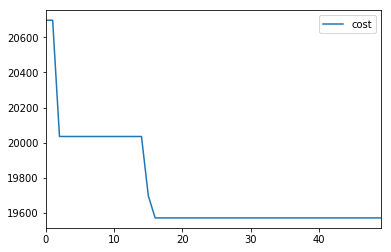

In [7]:
plot_list.plot(y="cost")